# Importing Libs

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reading data

In [18]:
files_list = os.listdir('../data')
target_file_name = 'profile.txt'
sensors_list = [file.split('.txt')[0] for file in files_list if file != target_file_name]

In [72]:
target = pd.read_csv(f'../data/{target_file_name}', delimiter='\t', header=None)[3] # 3 is reference to the Hydraulic accumulator

In [33]:
experiment_time_seconds = 60
sensors_data_dict_freq = {}
sensors_names_dict_freq = {}
for sensor in sensors_list:
    df_sensor = pd.read_csv(f'../data/{sensor}.txt', delimiter='\t', header=None)
    n_samples = df_sensor.shape[1]
    freq = n_samples/experiment_time_seconds
    if freq not in sensors_data_dict_freq:
        sensors_data_dict_freq[freq]=df_sensor
        sensors_names_dict_freq[freq]=[sensor]
    else:
        sensors_data_dict_freq[freq]=np.dstack((sensors_data_dict_freq[freq], df_sensor))
        sensors_names_dict_freq[freq]+=[sensor]


In [40]:
for freq, names_list in sensors_names_dict_freq.items():
    n_sensors = len(names_list)
    print(f'There are {n_sensors} sensors with the frequency of {int(freq)} Hz.')

There are 8 sensors with the frequency of 1 Hz
There are 7 sensors with the frequency of 100 Hz
There are 2 sensors with the frequency of 10 Hz


In [34]:
one_hz_data = sensors_data_dict_freq[1]
one_hz_names = sensors_names_dict_freq[1]

ten_hz_data = sensors_data_dict_freq[10]
ten_hz_names = sensors_names_dict_freq[10]

hund_hz_data = sensors_data_dict_freq[100]
hund_hz_names = sensors_names_dict_freq[100]

# Exploratory Data Analysis

According to the documentation the representation of the target values is:

- Hydraulic accumulator / bar: \
      - 130: optimal pressure (599 instances) \
      - 115: slightly reduced pressure (399 instances) \
      - 100: severely reduced pressure (399 instances) \
      - 90: close to total failure (808 instances)

For easier interpretability I will assume:

- Hydraulic accumulator / bar: \
      - 0: optimal pressure (599 instances) \
      - 1: slightly reduced pressure (399 instances) \
      - 2: severely reduced pressure (399 instances) \
      - 3: close to total failure (808 instances)

In [75]:
rename_target = {
    130:0,
    115:1,
    100:2,
    90:3
}
target = target.apply(lambda x:rename_target[x])

In [116]:
df_count = pd.DataFrame({'condition':target.value_counts().index, 'count':target.value_counts().values})
df_count = df.sort_values(by='condition').reset_index(drop=True)
df_count

,condition,count
0,0,599
1,1,399
2,2,399
3,3,808


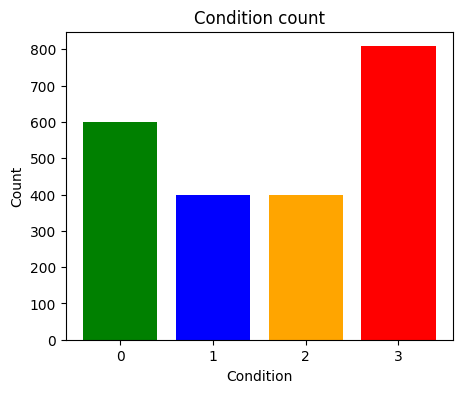

In [124]:
plt.figure(figsize=(5, 4))  
plt.bar(df['condition'], df['count'], color=['green', 'blue', 'orange', 'red'])
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Condition count')
plt.xticks(df['condition'])
plt.show()